# NDP Songs - Spotify audio features analysis

## Setup
First of all, register Your Application With Spotify.
In order to access certain features of the Web API, we need to tell spotify that we're a legitimate app. To do this, go to https://developer.spotify.com/my-applications and create a new Application.

For the Redirect URI, add http://localhost/ 

From that page, copy your ClientId and your ClientSecret.

You need to set your Spotify API credentials. You can do this by
setting environment variables like so:

Go to https://plot.ly/settings/api#/ and get api key.


```shell
os.environ['SPOTIPY_CLIENT_ID'] = 'your-spotify-client-id'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'your-spotify-client-secret'
os.environ['SPOTIPY_REDIRECT_URI' ] = 'http://localhost/'
```

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
import spotipy
import random
import os
import requests
import spotipy.util as util
from requests.auth import HTTPBasicAuth
import matplotlib.pyplot as plt
from matplotlib import font_manager
from math import pi

In [2]:
SPOTIPY_CLIENT_ID = os.environ.get('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET = os.environ.get('SPOTIPY_CLIENT_SECRET')
SPOTIPY_REDIRECT_URI = os.environ.get('SPOTIPY_REDIRECT_URI')

## Get the access token for the app given the code¶


In [3]:
# Get token 
token = util.oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
cache_token = token.get_access_token()
spotify = spotipy.Spotify(cache_token)

## Read CSV

In [4]:
origin_df = pd.read_csv("./spotify-id.csv")
origin_df = pd.DataFrame(origin_df)
origin_df

,year,title,composer,writer,singer,spotify_id
0,1985,Stand Up for Singapore,Hugh Harrison,Hugh Harrison,NaN,2aIkiuxUesXTGU756fBJYD
1,1986,"Count on Me, Singapore",Hugh Harrison,Hugh Harrison,Clement Chow,3dY7P7YoGU0gYMmFs1krC1
2,1987,We are Singapore,Hugh Harrison,Hugh Harrison,"Jonathan Tan Teck Meng, Roslinda Baharudin, Ro...",0QeDK7Aow84hUKoLrZ1mvK
3,1990,"One People, One Nation, One Singapore",Jeremy Monteiro,Jim Aitchison\nwho was also from the advertisi...,NaN,0NsXuk0c78hzZkDr7UsIJ3
4,1998,Home,Dick Lee,Dick Lee,Kit Chan,1vo8399T9sWFZ9vbrEcTL5
5,1999,Together,Ken Lim,Ken Lim,Evelyn Tan and Dreamz FM,6lago1vFsu3gw26lgKGtwa
6,2000,Shine on Me,Jim Lim,Jim Lim,Mavis Hee and Jai Wahab,1PBxQWuUn6RFzsg30gNH0H
7,2001,Where I Belong,Ken Lim,Ken Lim,Tanya Chua,0u0a0p4hWefiy09bYqzZ2A
8,2002,We Will Get There,Dick Lee,Dick Lee,Stefanie Sun,5aY2Igd9adKu3AqY1w95Xm
9,2003,One United People,Joshua Wan,Joshua Wan,Stefanie Sun,2h5gMUxXk3OBfOX9KS5hiX


In [5]:
song_ids = list(origin_df['spotify_id'])
song_ids

['2aIkiuxUesXTGU756fBJYD',
 '3dY7P7YoGU0gYMmFs1krC1',
 '0QeDK7Aow84hUKoLrZ1mvK',
 '0NsXuk0c78hzZkDr7UsIJ3',
 '1vo8399T9sWFZ9vbrEcTL5',
 '6lago1vFsu3gw26lgKGtwa',
 '1PBxQWuUn6RFzsg30gNH0H',
 '0u0a0p4hWefiy09bYqzZ2A',
 '5aY2Igd9adKu3AqY1w95Xm',
 '2h5gMUxXk3OBfOX9KS5hiX',
 '7phKkEWEipo3sDrZJiG9uJ',
 '2w5L5kQVkSRdduNewYPDA5',
 '2kACPmwS9MxrNCT0vcI1nP',
 '2OmArKXeh9feaFzyE4UOKh',
 '30QbxMta1DGgfcHUc9GfKi',
 '21gm9fNWcgpWyPY3a9t7FZ',
 '3S19ddIcYfyYhw7ZwKm58w',
 '14dThbrteRM57dxmpV26a8',
 '1W5ss3pBJ3W0v8gPhbLl8C',
 '4i0uKI1dwo2KEzLhsF8CWr',
 '5WtMlbTDNZlbN8xZ5zfXva',
 '6cHJBXRYMS2vCPeO2IaSKY',
 '0pSehMgUmj6t3ILbwDynI3']

## Get popularity index for all tracks


In [6]:
all_track_popularity = []
for song_id in song_ids:
    result = spotify.track(song_id)
    all_track_popularity.append(result['popularity'])

    
popularity_df = pd.DataFrame({'popularity': list(all_track_popularity)})
popularity_df.columns = ['popularity']
popularity_df

pd.concat([origin_df.year, origin_df.title, popularity_df], axis=1, sort=False)

,year,title,popularity
0,1985,Stand Up for Singapore,20
1,1986,"Count on Me, Singapore",20
2,1987,We are Singapore,15
3,1990,"One People, One Nation, One Singapore",21
4,1998,Home,30
5,1999,Together,19
6,2000,Shine on Me,13
7,2001,Where I Belong,27
8,2002,We Will Get There,16
9,2003,One United People,23


## Get audio analysis of Count on Me, Singapore
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/

In [11]:
audio_analysis = spotify.audio_analysis('3dY7P7YoGU0gYMmFs1krC1')
audio_analysis

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1476646632,
  'analysis_time': 37.83224,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 5578356,
  'duration': 252.98667,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 0.47782,
  'start_of_fade_out': 248.09361,
  'loudness': -5.559,
  'tempo': 85.744,
  'tempo_confidence': 0.22,
  'time_signature': 4,
  'time_signature_confidence': 0.997,
  'key': 5,
  'key_confidence': 0.777,
  'mode': 1,
  'mode_confidence': 0.704,
  'codestring': 'eJxNmom1HDkOBF0pE3gf_js2EcmWRvt2tZ_oKh44Egmw9rx7r9v7V7562-q17_2NcRyVvWcb3xzjjdY9_duFUSnn1r3O_m473zlljzL7_Gqd7WvlzrZ2a18do3ytzrrauvy6V_lWPWfdOy9z8jDv9nlXu19ru308UdrZk9fGGt8tZTT-27926vrWWKe02tvHPpe_9nIPD_fONt6vhR332cq_vyJ3OOcezNIPu3oPt7W-wTk832y18PB0glbOmWOx0BzlcOZbRu0ccLnJe2qtRWWsNddXTx-1dCbd6OWbdde2y77fvm

## Get audio features for all songs¶


In [12]:
all_audio_features = []
for song_id in origin_df['spotify_id']:
    result = spotify.audio_features([song_id])[0]
    all_audio_features.append(result)
all_audio_features_df = pd.DataFrame(all_audio_features)
pd.concat([origin_df.year, origin_df.title, all_audio_features_df], axis=1, sort=False)


,year,title,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,1985,Stand Up for Singapore,0.00122,https://api.spotify.com/v1/audio-analysis/2aIk...,0.278,116040,0.721,2aIkiuxUesXTGU756fBJYD,0.000861,0,0.4610,-4.834,1,0.0364,148.052,4,https://api.spotify.com/v1/tracks/2aIkiuxUesXT...,audio_features,spotify:track:2aIkiuxUesXTGU756fBJYD,0.355
1,1986,"Count on Me, Singapore",0.39800,https://api.spotify.com/v1/audio-analysis/3dY7...,0.404,252987,0.614,3dY7P7YoGU0gYMmFs1krC1,0.000047,5,0.4600,-5.559,1,0.0290,85.744,4,https://api.spotify.com/v1/tracks/3dY7P7YoGU0g...,audio_features,spotify:track:3dY7P7YoGU0gYMmFs1krC1,0.357
2,1987,We are Singapore,0.78500,https://api.spotify.com/v1/audio-analysis/0QeD...,0.478,262966,0.545,0QeDK7Aow84hUKoLrZ1mvK,0.000026,0,0.5360,-6.408,1,0.0286,92.521,4,https://api.spotify.com/v1/tracks/0QeDK7Aow84h...,audio_features,spotify:track:0QeDK7Aow84hUKoLrZ1mvK,0.374
3,1990,"One People, One Nation, One Singapore",0.05270,https://api.spotify.com/v1/audio-analysis/0NsX...,0.481,169813,0.524,0NsXuk0c78hzZkDr7UsIJ3,0.000000,0,0.0937,-6.987,1,0.0273,82.915,4,https://api.spotify.com/v1/tracks/0NsXuk0c78hz...,audio_features,spotify:track:0NsXuk0c78hzZkDr7UsIJ3,0.291
4,1998,Home,0.70200,https://api.spotify.com/v1/audio-analysis/1vo8...,0.372,254520,0.328,1vo8399T9sWFZ9vbrEcTL5,0.000000,10,0.1420,-8.418,1,0.0305,128.837,4,https://api.spotify.com/v1/tracks/1vo8399T9sWF...,audio_features,spotify:track:1vo8399T9sWFZ9vbrEcTL5,0.122
5,1999,Together,0.65600,https://api.spotify.com/v1/audio-analysis/6lag...,0.358,210520,0.821,6lago1vFsu3gw26lgKGtwa,0.000022,5,0.0661,-5.575,1,0.0519,79.779,4,https://api.spotify.com/v1/tracks/6lago1vFsu3g...,audio_features,spotify:track:6lago1vFsu3gw26lgKGtwa,0.522
6,2000,Shine on Me,0.53100,https://api.spotify.com/v1/audio-analysis/1PBx...,0.583,236680,0.484,1PBxQWuUn6RFzsg30gNH0H,0.000000,10,0.1160,-7.269,1,0.0326,121.905,4,https://api.spotify.com/v1/tracks/1PBxQWuUn6RF...,audio_features,spotify:track:1PBxQWuUn6RFzsg30gNH0H,0.335
7,2001,Where I Belong,0.10300,https://api.spotify.com/v1/audio-analysis/0u0a...,0.487,183160,0.510,0u0a0p4hWefiy09bYqzZ2A,0.000000,3,0.0819,-6.800,1,0.0276,109.155,4,https://api.spotify.com/v1/tracks/0u0a0p4hWefi...,audio_features,spotify:track:0u0a0p4hWefiy09bYqzZ2A,0.105
8,2002,We Will Get There,0.06950,https://api.spotify.com/v1/audio-analysis/5aY2...,0.607,249107,0.795,5aY2Igd9adKu3AqY1w95Xm,0.000004,8,0.1410,-5.836,1,0.0379,119.973,4,https://api.spotify.com/v1/tracks/5aY2Igd9adKu...,audio_features,spotify:track:5aY2Igd9adKu3AqY1w95Xm,0.323
9,2003,One United People,0.35000,https://api.spotify.com/v1/audio-analysis/2h5g...,0.488,171320,0.760,2h5gMUxXk3OBfOX9KS5hiX,0.000000,11,0.3580,-5.850,1,0.0381,79.962,4,https://api.spotify.com/v1/tracks/2h5gMUxXk3OB...,audio_features,spotify:track:2h5gMUxXk3OBfOX9KS5hiX,0.501


## Extract features and normalization
[Audio Features Object - Spoity API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [16]:
features_keys = ['loudness', 'acousticness', 'duration_ms', 'energy', 'speechiness', 'acousticness', 'liveness', 'danceability', 'valence', 'key', 'tempo']

# Get list of features and normalize values from 0 to 1
# In order to plot, normalize the key, loudness, tempo, and duration_ms values to be from 0 to 1. 
def normalized(key, lst):
    feature = [x[key] for x in lst]
    if key in features_keys:
        return list(minmax_scale(feature))
    else:
        return feature
    
audio_features_res = {}
for key in features_keys:
    audio_features_res[key] = normalized(key, all_audio_features)
    

audio_features_df = pd.DataFrame(audio_features_res)
audio_features_df.rename(columns={'duration_ms':'duration'}, inplace=True)
audio_features_df

,loudness,acousticness,duration,energy,speechiness,liveness,danceability,valence,key,tempo
0,0.950182,0.000000,0.000000,0.724409,0.046987,0.841371,0.101952,0.363901,0.000000,0.808232
1,0.840067,0.432797,0.932081,0.555906,0.009193,0.839255,0.375271,0.366812,0.454545,0.127940
2,0.711118,0.854927,1.000000,0.447244,0.007150,1.000000,0.535792,0.391557,0.000000,0.201933
3,0.623177,0.056153,0.365987,0.414173,0.000511,0.064509,0.542299,0.270742,0.000000,0.097052
4,0.405832,0.764393,0.942515,0.105512,0.016854,0.166667,0.305857,0.024745,0.909091,0.598439
5,0.837637,0.714217,0.643045,0.881890,0.126149,0.006134,0.275488,0.606987,0.454545,0.062813
6,0.580346,0.577870,0.821094,0.351181,0.027579,0.111675,0.763557,0.334789,0.909091,0.522754
7,0.651580,0.111019,0.456829,0.392126,0.002043,0.039552,0.555315,0.000000,0.272727,0.383546
8,0.797995,0.074478,0.905674,0.840945,0.054648,0.164552,0.815618,0.317322,0.727273,0.501660
9,0.795869,0.380440,0.376244,0.785827,0.055669,0.623519,0.557484,0.576419,1.000000,0.064811


# Make audio features visualization - Radar Chart


In [18]:
radar_chart_df = pd.concat([origin_df.year, origin_df.title, audio_features_df], axis=1, sort=False)
radar_chart_df
radar_chart_df


,year,title,loudness,acousticness,duration,energy,speechiness,liveness,danceability,valence,key,tempo
0,1985,Stand Up for Singapore,0.950182,0.000000,0.000000,0.724409,0.046987,0.841371,0.101952,0.363901,0.000000,0.808232
1,1986,"Count on Me, Singapore",0.840067,0.432797,0.932081,0.555906,0.009193,0.839255,0.375271,0.366812,0.454545,0.127940
2,1987,We are Singapore,0.711118,0.854927,1.000000,0.447244,0.007150,1.000000,0.535792,0.391557,0.000000,0.201933
3,1990,"One People, One Nation, One Singapore",0.623177,0.056153,0.365987,0.414173,0.000511,0.064509,0.542299,0.270742,0.000000,0.097052
4,1998,Home,0.405832,0.764393,0.942515,0.105512,0.016854,0.166667,0.305857,0.024745,0.909091,0.598439
5,1999,Together,0.837637,0.714217,0.643045,0.881890,0.126149,0.006134,0.275488,0.606987,0.454545,0.062813
6,2000,Shine on Me,0.580346,0.577870,0.821094,0.351181,0.027579,0.111675,0.763557,0.334789,0.909091,0.522754
7,2001,Where I Belong,0.651580,0.111019,0.456829,0.392126,0.002043,0.039552,0.555315,0.000000,0.272727,0.383546
8,2002,We Will Get There,0.797995,0.074478,0.905674,0.840945,0.054648,0.164552,0.815618,0.317322,0.727273,0.501660
9,2003,One United People,0.795869,0.380440,0.376244,0.785827,0.055669,0.623519,0.557484,0.576419,1.000000,0.064811


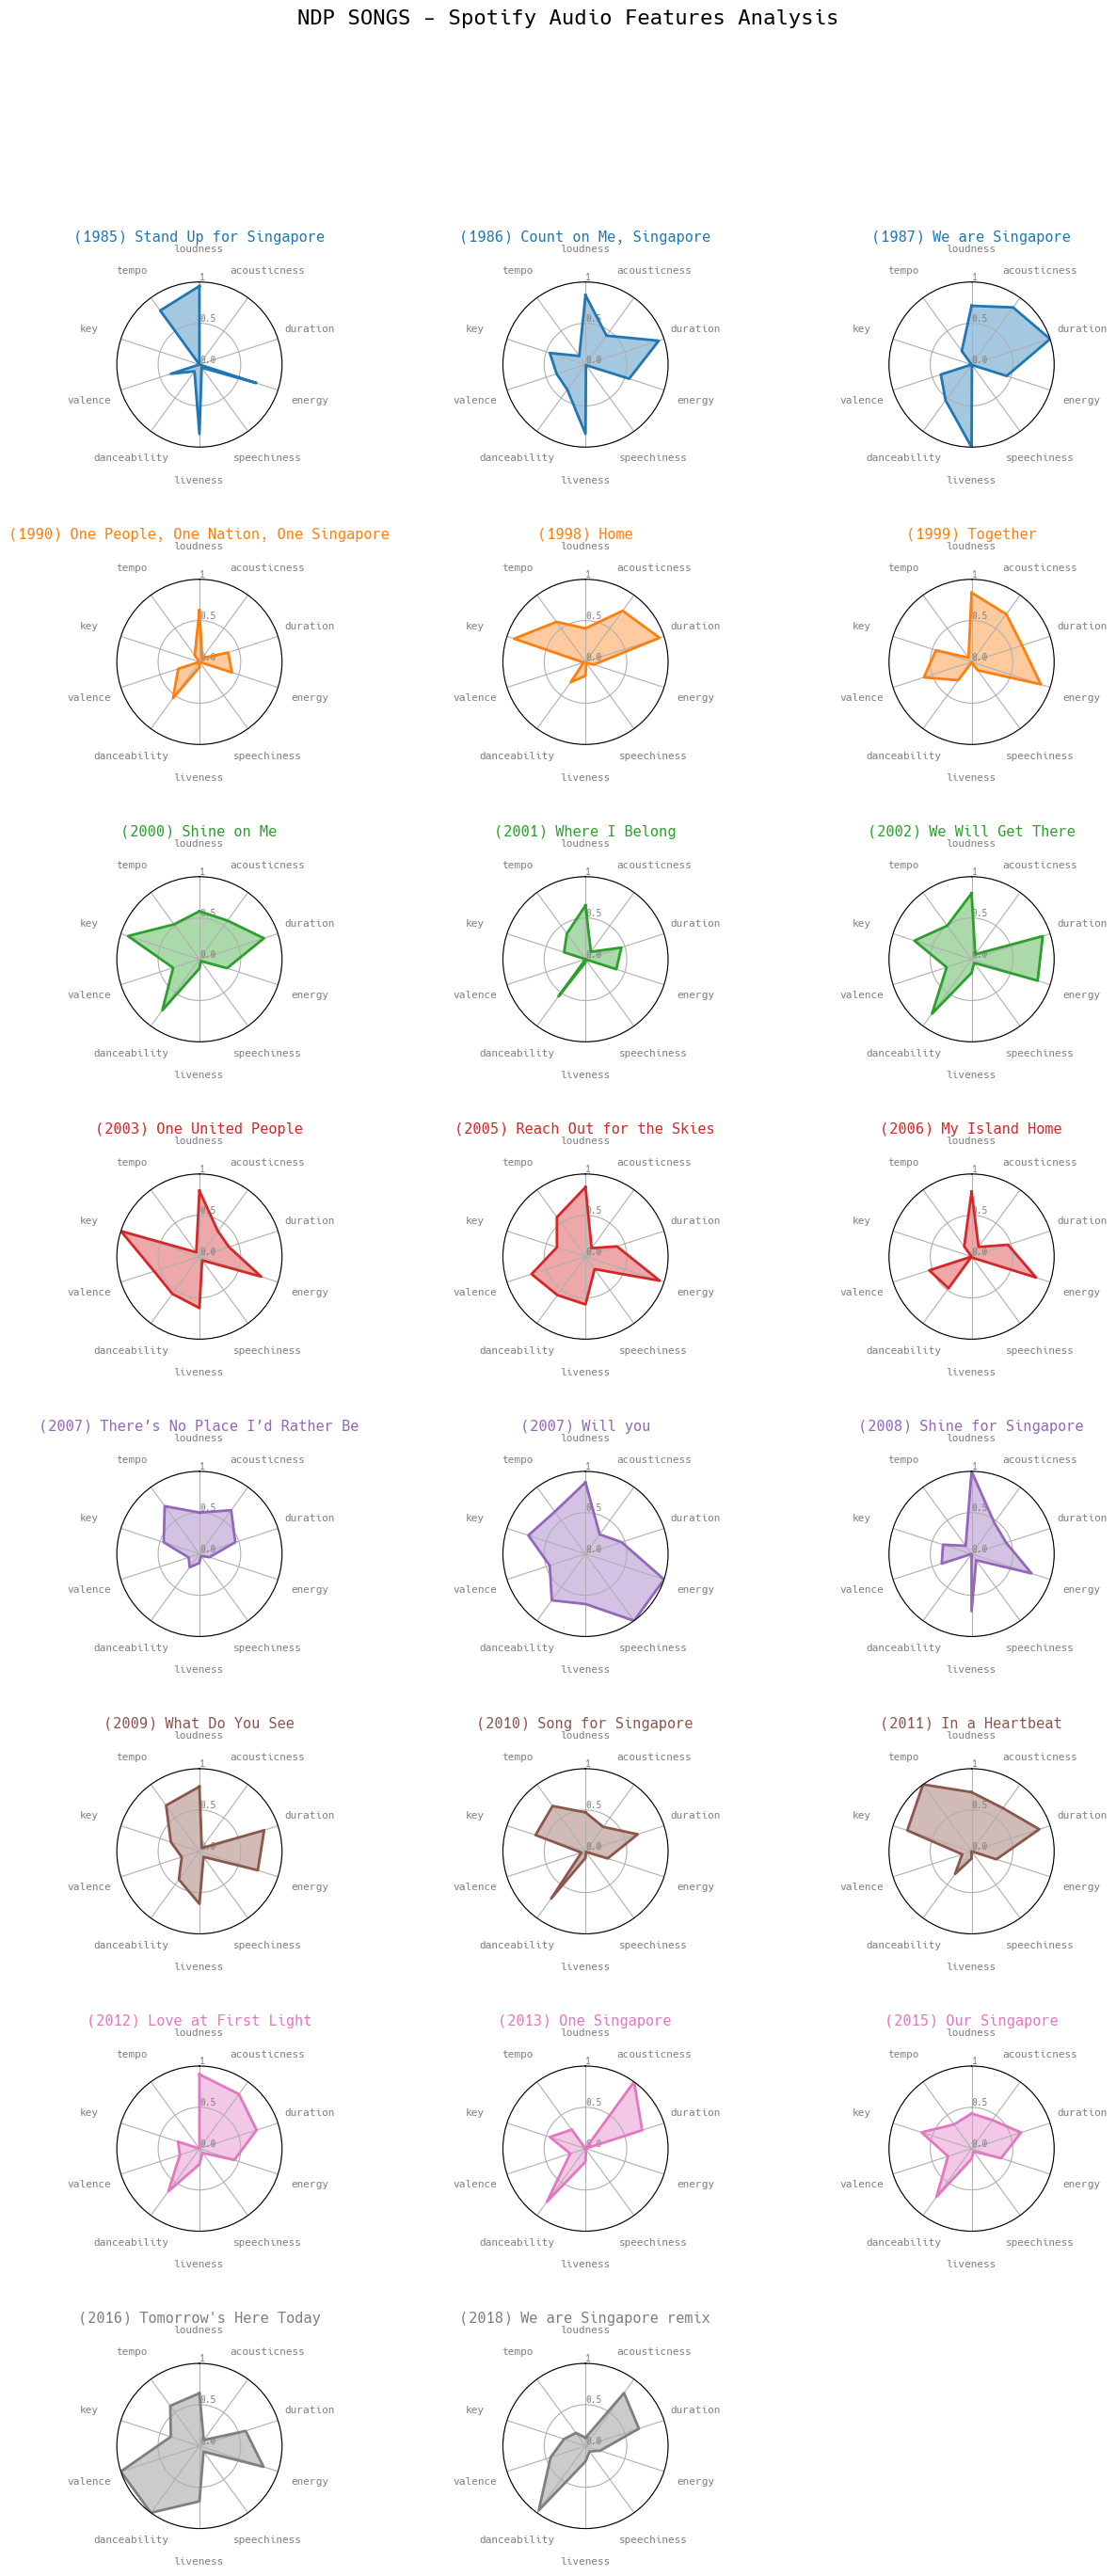

In [22]:
# Set font
FONT_NAME = "Hack Nerd Font"
plt.rcParams['font.family'] = FONT_NAME
plt.rcParams['axes.unicode_minus'] = False
df = radar_chart_df

SONG_YEARS = origin_df['year']
SONG_TITLES = origin_df['title']

# List all fonts available in matplotlib plus samples
# http://jonathansoma.com/lede/foundations-2018/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

def make_spider(row, title, color):
     
# number of variable
    categories=list(df)[2:]
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10,3,row+1, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.tick_params(axis='both', which='major', pad=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.0, 0.5, 1], ["0.0","0.5", "1"], color="grey", size=7)
    plt.ylim(0,1)
    
    
    # Set starting index
    values=df.iloc[row].tolist()[2:]
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.2)

# initialize the figure
my_dpi=100
plt.figure(figsize=(1500/my_dpi, 4000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace = .8)
plt.suptitle(f'NDP SONGS - Spotify Audio Features Analysis', y=.95, fontsize=16, va='center')

# Create a color palette
my_palette = plt.cm.get_cmap("tab10") 

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=f'({SONG_YEARS[row]}) {SONG_TITLES[row]}', color=my_palette(int(row/3)))

if not os.path.exists('image'):
    os.makedirs('image')

plt.savefig(f'image/ndp-songs-spotify.png', dpi=300)
plt.show()
plt.close()